# 1. AI in Medicine Machine Learning Workshop
## Predicting High Influenza Activity Using Surveillance Data

Today we will:
- Load real public health data
- Transform it into machine learning format
- Train a simple predictive model
- Evaluate performance
- Discuss clinical implications

# 2. What is Machine Learning?

Machine learning allows computers to learn patterns from data
and make predictions.

In medicine, ML can help:
- Predict disease risk
- Forecast outbreaks
- Assist diagnosis
- Support clinical decisions

In [ ]:
# 3. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

In [ ]:
# 4. Load Dataset
df = pd.read_csv("data-table.csv")
df # shows entire table (be careful if table is large)
# use df.head() to show 5 rows or df.head(17) to show 17 rows

,week_end,pathogen,Children
0,2025-10-04,COVID-19,2.6
1,2025-10-04,Influenza,17.1
2,2025-10-11,Influenza,20.4
3,2025-10-11,COVID-19,3.2
4,2025-10-11,RSV,NaN
5,2025-10-18,Influenza,23.9
6,2025-10-18,COVID-19,3.4
7,2025-10-18,RSV,NaN
8,2025-10-25,Influenza,27.7
9,2025-10-25,COVID-19,4.2


# 5. Form a Prediction
Predict whether influenza will be high using COVID levels and time

In [ ]:
# 6. Pivot the Data
df_pivot = df.pivot(index='week_end', columns='pathogen', values='Children')
df_pivot = df_pivot.fillna(0)
df_pivot.head()

pathogen,COVID-19,Influenza,RSV
week_end,,,
2025-10-04,2.6,17.1,0.0
2025-10-11,3.2,20.4,0.0
2025-10-18,3.4,23.9,0.0
2025-10-25,4.2,27.7,0.0
2025-11-01,5.0,31.5,0.0


In [ ]:
# 7. Reset Index + Create Week Number
df_pivot = df_pivot.reset_index()
df_pivot['week_end'] = pd.to_datetime(df_pivot['week_end'])
df_pivot['week_num'] = ((df_pivot['week_end'] - df_pivot['week_end'].min()).dt.days / 7).astype(int)

df_pivot.head()

pathogen,week_end,COVID-19,Influenza,RSV,week_num
0,2025-10-04,2.6,17.1,0.0,0
1,2025-10-11,3.2,20.4,0.0,1
2,2025-10-18,3.4,23.9,0.0,2
3,2025-10-25,4.2,27.7,0.0,3
4,2025-11-01,5.0,31.5,0.0,4


In [ ]:
# 8. Define Target Variable
# Define "high influenza" as above the median week (splits data into 0/1)
threshold = df_pivot['Influenza'].median()
df_pivot['target'] = (df_pivot['Influenza'] > threshold).astype(int)

print("Threshold (median influenza):", threshold)
print(df_pivot['target'].value_counts())

Threshold (median influenza): 38.349999999999994
target
0    8
1    8
Name: count, dtype: int64


# 9. Why Does Class Balance Matter?

If most weeks are low influenza,
a model could just predict "low" every time
and still appear accurate.

This is why accuracy alone is not enough in medicine.

In [ ]:
# 10. Define Features and Target
X = df_pivot[['COVID-19', 'week_num']]
y = df_pivot['target']
X

pathogen,COVID-19,week_num
0,2.6,0
1,3.2,1
2,3.4,2
3,4.2,3
4,5.0,4
5,5.5,5
6,5.8,6
7,6.7,7
8,6.9,8
9,7.0,9


In [ ]:
y

,target
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,1
9,1


In [ ]:
# 11. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [ ]:
# 12. Check Class Counts
print("y_train class counts:")
print(y_train.value_counts())

y_train class counts:
target
1    6
0    6
Name: count, dtype: int64


In [ ]:
# 13. Train Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# 14. Make Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [ ]:
# 15. Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print("Accuracy:", accuracy)
print("AUC:", auc)
print("Confusion Matrix:")
print(cm)
# [True Negative, False Positive]
# [False Negative, True Positive]

Accuracy: 1.0
AUC: 1.0
Confusion Matrix:
[[2 0]
 [0 2]]


# 16. Understanding Errors in Medicine

False Positives:
Predict high influenza when it isn't high.
→ Could cause unnecessary preparation or concern.

False Negatives:
Miss a high influenza week.
→ Could delay public health response.

In medicine, false negatives are often more dangerous.

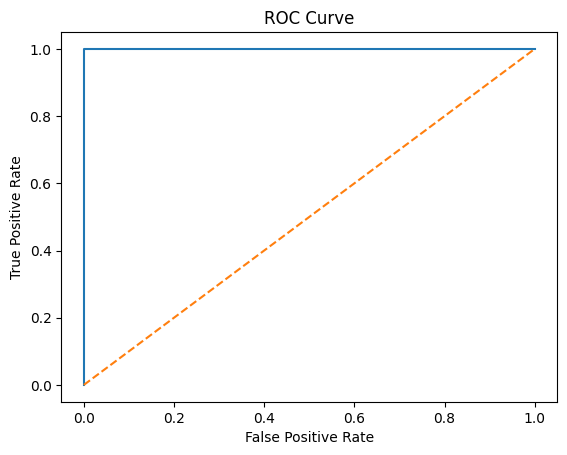

In [ ]:
# 17. Receiver Operating Characteristic (ROC) Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

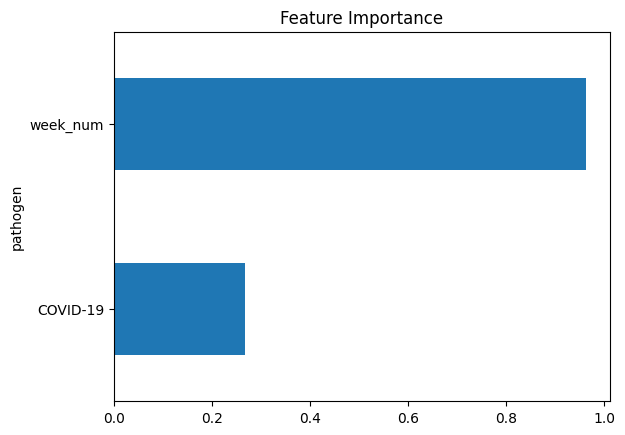

In [ ]:
# 18. Feature Importance
coefficients = pd.Series(model.coef_[0], index=X.columns)
coefficients.sort_values().plot(kind='barh')
plt.title("Feature Importance")
plt.show()

# 19. Limitations

- Small dataset
- Retrospective data
- No external validation
- Correlation does not imply causation
- This does not replace physician judgment